In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0
...,...,...,...,...,...,...,...,...,...,...
44000,35,UNI,Unicaja,2021-03-24,0.802000,0.822000,0.786500,0.819500,0.751219,2616012
44001,35,UNI,Unicaja,2021-03-23,0.770000,0.807500,0.762500,0.802500,0.735636,2436213
44002,35,UNI,Unicaja,2021-03-22,0.780000,0.780500,0.760000,0.764000,0.700343,1420069
44003,35,UNI,Unicaja,2021-03-30,0.867000,0.878500,0.855500,0.877500,0.804387,3028721


In [5]:
df.empresa.unique()

array(['Acciona', 'Acciona Energia', 'Acerinox', 'Grupo ACS', 'Aena',
       'Amadeus', 'Arcelor', 'Sabadell', 'Santander', 'Bankinter', 'BBVA',
       'Caixabank', 'Cellnex', 'Enagas', 'Endesa', 'Ferrovial', 'Fluidra',
       'Grifols', 'Iberdrola', 'Inditex', 'Indra',
       'Colonial Inmobiliaria', 'Logista', 'mapfre', 'Melia',
       'Merlin Properties', 'Naturgy', 'REE', 'Repsol',
       'Laboratorios Rovi', 'Sacyr', 'Solaria', 'Telefonica', 'Unicaja'],
      dtype=object)

In [6]:
# Paso 2: Filtrar por la empresa sobre la que realizar el modelo

aena = df[df['empresa'] == 'Aena']

aena.shape

(1325, 10)

In [7]:
aena = aena [['date','open','high','low','close','adj close']]

aena.shape

(1325, 6)

In [8]:
# Paso 4: Modificar el formato de columna 'date' (format: object ===> datatime)

aena['date'] = pd.to_datetime(aena['date'], format="%Y-%m-%d")

aena.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1325 entries, 4650 to 5974
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1325 non-null   datetime64[ns]
 1   open       1325 non-null   float64       
 2   high       1325 non-null   float64       
 3   low        1325 non-null   float64       
 4   close      1325 non-null   float64       
 5   adj close  1325 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.5 KB


In [9]:
# Paso 5: Ordenar el DF por fecha

aena.sort_values(by='date',ascending= True, inplace=True)

aena.head()

,date,open,high,low,close,adj close
5325,2019-01-02,134.750000,138.000000,133.949997,137.000000,118.740273
5324,2019-01-03,136.449997,139.149994,136.399994,137.050003,118.783615
5323,2019-01-04,137.850006,140.949997,137.699997,140.500000,121.773781
5322,2019-01-07,141.000000,141.100006,138.199997,139.149994,120.603699
5321,2019-01-08,139.250000,141.050003,138.800003,140.000000,121.340416


In [12]:
# Paso 6: Filtrar nuevamente para eliminar efecto COVID del análisis (previo a 2021)

# Filtro:

fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

aena = aena[(aena['date'] >= fecha_inicio) & (aena['date'] <= fecha_fin)]

# Comprobar si se ha aplicado correctamente

aena.shape

(812, 6)

In [15]:
# Paso 7: Añadir al DF fechas obviadas por mercado de valores español (fin de semana y festivos)

# Rango de fechas desde '2021-01-01' a '2024-03-01'

date_range = pd.date_range(start=aena['date'].min(), end=aena['date'].max(), freq='D')

# Reindexa el DF con el nuevo rango de fechas

aena = aena.set_index('date').reindex(date_range).reset_index()

# Volver a modificar el nombre de columna 'date'

aena = aena.rename(columns={'index': 'date'})

In [16]:
# Paso 8: Comprobar que ha introducido la fechas ausentes en el DF original

aena.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,148.000000,148.600006,137.000000,138.500000,134.197357
1,2021-01-05,136.800003,138.600006,135.600006,138.300003,134.003571
2,2021-01-06,139.399994,141.399994,137.300003,141.100006,136.716583
3,2021-01-07,141.699997,141.699997,136.300003,139.300003,134.972504
4,2021-01-08,140.399994,141.199997,138.800003,140.699997,136.329010
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,139.899994,140.000000,137.500000,138.899994,134.584915
8,2021-01-12,139.899994,140.699997,138.800003,140.500000,136.135223
9,2021-01-13,140.600006,142.000000,139.000000,139.199997,134.875595


In [17]:
# Paso 9: Rellenar valores nulos con el anterior valor de la columna(viernes o previo a festivo)

aena = aena.fillna(method='ffill')

In [18]:
# Paso 10: Comprobar que se han introducido los valores correctamente


aena.head(10)

,date,open,high,low,close,adj close
0,2021-01-04,148.000000,148.600006,137.000000,138.500000,134.197357
1,2021-01-05,136.800003,138.600006,135.600006,138.300003,134.003571
2,2021-01-06,139.399994,141.399994,137.300003,141.100006,136.716583
3,2021-01-07,141.699997,141.699997,136.300003,139.300003,134.972504
4,2021-01-08,140.399994,141.199997,138.800003,140.699997,136.329010
5,2021-01-09,140.399994,141.199997,138.800003,140.699997,136.329010
6,2021-01-10,140.399994,141.199997,138.800003,140.699997,136.329010
7,2021-01-11,139.899994,140.000000,137.500000,138.899994,134.584915
8,2021-01-12,139.899994,140.699997,138.800003,140.500000,136.135223
9,2021-01-13,140.600006,142.000000,139.000000,139.199997,134.875595


In [19]:
# Paso 11: Establecer columna 'date' como índice para modelo

aena = aena.set_index('date')

aena.head(10)

,open,high,low,close,adj close
date,,,,,
2021-01-04,148.000000,148.600006,137.000000,138.500000,134.197357
2021-01-05,136.800003,138.600006,135.600006,138.300003,134.003571
2021-01-06,139.399994,141.399994,137.300003,141.100006,136.716583
2021-01-07,141.699997,141.699997,136.300003,139.300003,134.972504
2021-01-08,140.399994,141.199997,138.800003,140.699997,136.329010
2021-01-09,140.399994,141.199997,138.800003,140.699997,136.329010
2021-01-10,140.399994,141.199997,138.800003,140.699997,136.329010
2021-01-11,139.899994,140.000000,137.500000,138.899994,134.584915
2021-01-12,139.899994,140.699997,138.800003,140.500000,136.135223


In [20]:
# Paso 12: Establecer siguiente criterio para que el modelo AR funcione

aena.index = pd.DatetimeIndex(aena.index).to_period('d')

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

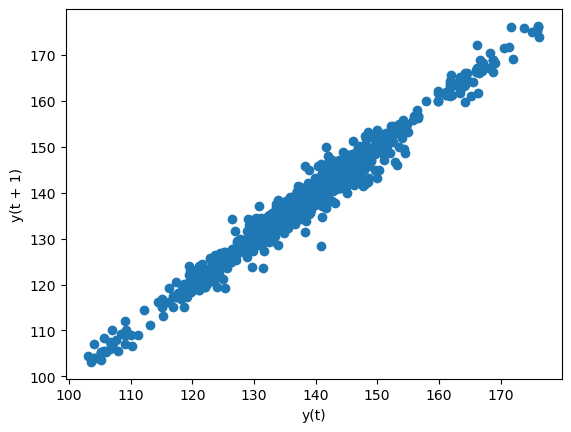

In [21]:
# Paso 13: Comprobar linealidad de la variable y = 'close'

from pandas.plotting import lag_plot

lag_plot(aena.close)

In [22]:
# Paso 14: Importar modelo de AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [23]:
# Paso 15: Realizar el split en el DF del train y el test

train, test = aena.close[:-10], aena.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [24]:
# Paso 16: Entrenar el modelo de AR

modelo = AR(train, lags=1).fit()

In [25]:
# Paso 17: Realizar predicción con el entrenamiento

pred = modelo.predict(len(train), len(aena.close)-1)

# Check sobre los valores de la predicción

pred

2024-02-21    170.264556
2024-02-22    170.031117
2024-02-23    169.799666
2024-02-24    169.570187
2024-02-25    169.342662
2024-02-26    169.117075
2024-02-27    168.893410
2024-02-28    168.671649
2024-02-29    168.451778
2024-03-01    168.233779
Freq: D, dtype: float64

In [26]:
# Paso 18: Chequear coincidencia entre test y pred

test

date
2024-02-21    171.399994
2024-02-22    171.649994
2024-02-23    176.000000
2024-02-24    176.000000
2024-02-25    176.000000
2024-02-26    176.300003
2024-02-27    173.800003
2024-02-28    175.899994
2024-02-29    175.149994
2024-03-01    174.949997
Freq: D, Name: close, dtype: float64

In [27]:
# Paso 19: Calcular el error de la predicción sobre la realidad

error = (pred - test).abs().sum()/len(pred)  

error

5.477410087182901

In [28]:
# Paso 20: Generar un DF sobre la comparativa en realidad, predicción y error

res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,171.399994,170.264556,-1.135438
2024-02-22,171.649994,170.031117,-1.618877
2024-02-23,176.000000,169.799666,-6.200334
2024-02-24,176.000000,169.570187,-6.429813
2024-02-25,176.000000,169.342662,-6.657338
2024-02-26,176.300003,169.117075,-7.182928
2024-02-27,173.800003,168.893410,-4.906593
2024-02-28,175.899994,168.671649,-7.228345
2024-02-29,175.149994,168.451778,-6.698216
2024-03-01,174.949997,168.233779,-6.716218
